In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import pi
import sqlite3
import pandas as pd
from IPython.display import display
import plotly.express as px
from prettytable import PrettyTable
from colorama import Fore, Back, Style, init
import warnings
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [ ]:
!cp ../Scrapers/nfl.db .

,Total Games,Win Percentage,Average Point Differential,Home Win Percentage,Away Win Percentage,Total Home Games,Total Away Games
Ravens,15,73.333333,20.214286,85.714286,62.5,7,8
Chiefs,15,66.666667,13.785714,44.444444,100.0,9,6


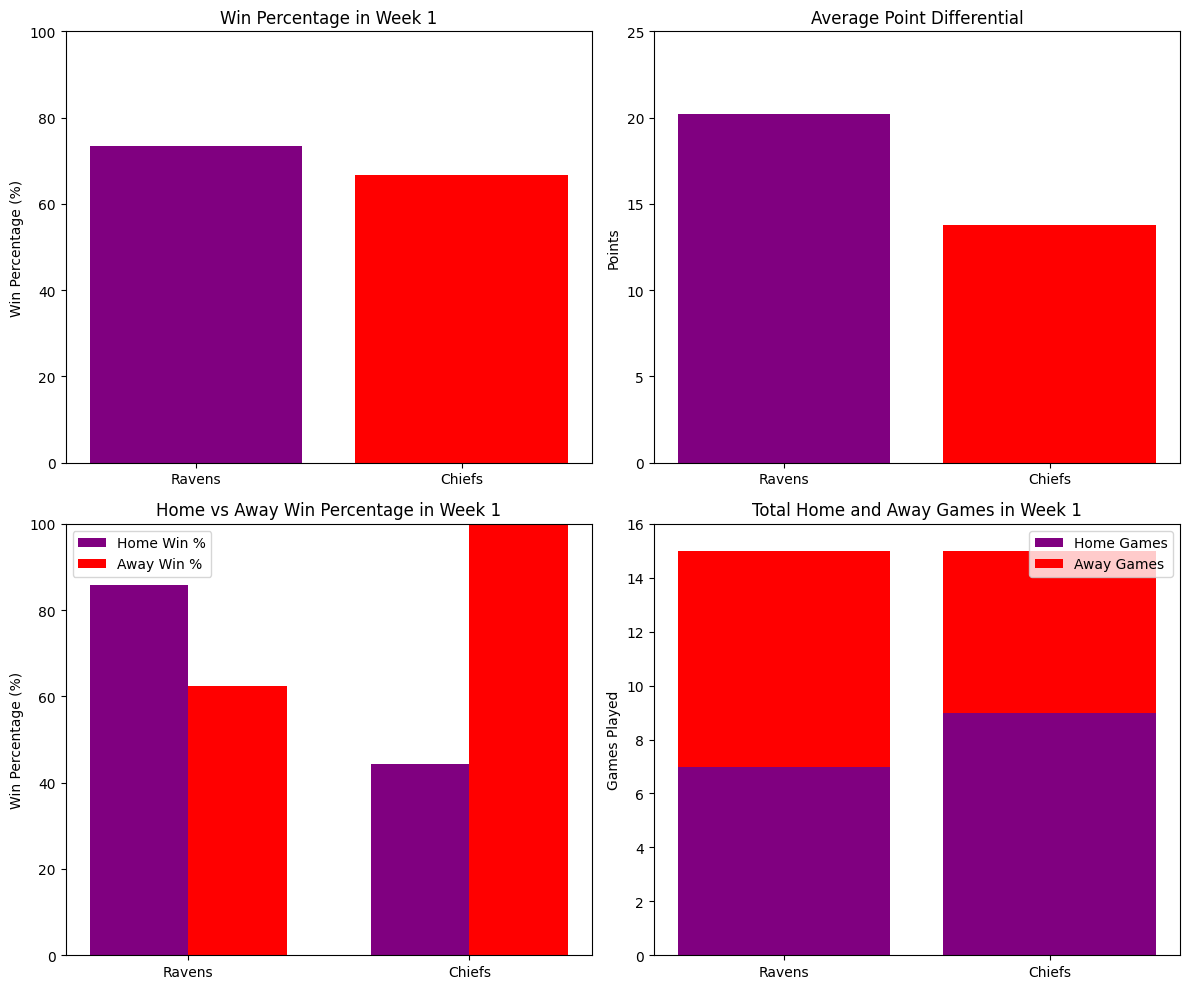

In [2]:
# Chiefs and Ravens Week 1 Stats

db_path = 'nfl.db'  # Replace with your actual path
conn = sqlite3.connect(db_path)

# Query to get all games since 2010
filtered_games_query = """
SELECT * 
FROM Games
WHERE season >= 2010;
"""
filtered_games = pd.read_sql(filtered_games_query, conn)

# Filter for Week 1 games only
week_1_games = filtered_games[filtered_games['week'] == '01']

# Ravens Week 1 Performance
ravens_week_1_games = week_1_games[(week_1_games['home_team'] == 'BAL') | (week_1_games['away_team'] == 'BAL')]
ravens_week_1_games['winner'] = ravens_week_1_games.apply(
    lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1
)
ravens_week_1_games['result'] = ravens_week_1_games.apply(
    lambda row: 'Win' if row['winner'] == 'BAL' else 'Loss', axis=1
)
ravens_win_percentage = (ravens_week_1_games[ravens_week_1_games['result'] == 'Win'].shape[0] / ravens_week_1_games.shape[0]) * 100
ravens_week_1_games['point_differential'] = ravens_week_1_games.apply(
    lambda row: abs(row['home_score'] - row['away_score']), axis=1
)
ravens_avg_point_differential = ravens_week_1_games['point_differential'].mean()
ravens_home_games = ravens_week_1_games[ravens_week_1_games['home_team'] == 'BAL']
ravens_away_games = ravens_week_1_games[ravens_week_1_games['away_team'] == 'BAL']
ravens_home_win_percentage = (ravens_home_games[ravens_home_games['result'] == 'Win'].shape[0] / ravens_home_games.shape[0]) * 100
ravens_away_win_percentage = (ravens_away_games[ravens_away_games['result'] == 'Win'].shape[0] / ravens_away_games.shape[0]) * 100
ravens_total_home_games = ravens_home_games.shape[0]
ravens_total_away_games = ravens_away_games.shape[0]
ravens_week_1_games_summary = {
    'Total Games': ravens_week_1_games.shape[0],
    'Win Percentage': ravens_win_percentage,
    'Average Point Differential': ravens_avg_point_differential,
    'Home Win Percentage': ravens_home_win_percentage,
    'Away Win Percentage': ravens_away_win_percentage,
    'Total Home Games': ravens_total_home_games,
    'Total Away Games': ravens_total_away_games
}

# Chiefs Week 1 Performance
chiefs_week_1_games = week_1_games[(week_1_games['home_team'] == 'KC') | (week_1_games['away_team'] == 'KC')]
chiefs_week_1_games['winner'] = chiefs_week_1_games.apply(
    lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1
)
chiefs_week_1_games['result'] = chiefs_week_1_games.apply(
    lambda row: 'Win' if row['winner'] == 'KC' else 'Loss', axis=1
)
chiefs_win_percentage = (chiefs_week_1_games[chiefs_week_1_games['result'] == 'Win'].shape[0] / chiefs_week_1_games.shape[0]) * 100
chiefs_week_1_games['point_differential'] = chiefs_week_1_games.apply(
    lambda row: abs(row['home_score'] - row['away_score']), axis=1
)
chiefs_avg_point_differential = chiefs_week_1_games['point_differential'].mean()
chiefs_home_games = chiefs_week_1_games[chiefs_week_1_games['home_team'] == 'KC']
chiefs_away_games = chiefs_week_1_games[chiefs_week_1_games['away_team'] == 'KC']
chiefs_home_win_percentage = (chiefs_home_games[chiefs_home_games['result'] == 'Win'].shape[0] / chiefs_home_games.shape[0]) * 100
chiefs_away_win_percentage = (chiefs_away_games[chiefs_away_games['result'] == 'Win'].shape[0] / chiefs_away_games.shape[0]) * 100
chiefs_total_home_games = chiefs_home_games.shape[0]
chiefs_total_away_games = chiefs_away_games.shape[0]
chiefs_week_1_games_summary = {
    'Total Games': chiefs_week_1_games.shape[0],
    'Win Percentage': chiefs_win_percentage,
    'Average Point Differential': chiefs_avg_point_differential,
    'Home Win Percentage': chiefs_home_win_percentage,
    'Away Win Percentage': chiefs_away_win_percentage,
    'Total Home Games': chiefs_total_home_games,
    'Total Away Games': chiefs_total_away_games
}

# Combine the summaries for Ravens and Chiefs
combined_summary = pd.DataFrame([ravens_week_1_games_summary, chiefs_week_1_games_summary], index=['Ravens', 'Chiefs'])

# Display the combined summary
display(combined_summary)

# Extracting data for visualization from the combined_summary
teams = combined_summary.index
total_games = combined_summary['Total Games'].values
win_percentage = combined_summary['Win Percentage'].values
avg_point_diff = combined_summary['Average Point Differential'].values
home_win_percentage = combined_summary['Home Win Percentage'].values
away_win_percentage = combined_summary['Away Win Percentage'].values
total_home_games = combined_summary['Total Home Games'].values
total_away_games = combined_summary['Total Away Games'].values

# Set up the figure and axis
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart for Win Percentage
ax[0, 0].bar(teams, win_percentage, color=['purple', 'red'])
ax[0, 0].set_title('Win Percentage in Week 1')
ax[0, 0].set_ylim(0, 100)
ax[0, 0].set_ylabel('Win Percentage (%)')

# Bar chart for Average Point Differential
ax[0, 1].bar(teams, avg_point_diff, color=['purple', 'red'])
ax[0, 1].set_title('Average Point Differential')
ax[0, 1].set_ylim(0, 25)
ax[0, 1].set_ylabel('Points')

# Bar chart for Home and Away Win Percentage
x = np.arange(len(teams))
width = 0.35

ax[1, 0].bar(x - width/2, home_win_percentage, width, label='Home Win %', color='purple')
ax[1, 0].bar(x + width/2, away_win_percentage, width, label='Away Win %', color='red')
ax[1, 0].set_title('Home vs Away Win Percentage in Week 1')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(teams)
ax[1, 0].set_ylim(0, 100)
ax[1, 0].set_ylabel('Win Percentage (%)')
ax[1, 0].legend()

# Stacked bar chart for Total Home and Away Games
ax[1, 1].bar(teams, total_home_games, label='Home Games', color='purple')
ax[1, 1].bar(teams, total_away_games, bottom=total_home_games, label='Away Games', color='red')
ax[1, 1].set_title('Total Home and Away Games in Week 1')
ax[1, 1].set_ylim(0, 16)
ax[1, 1].set_ylabel('Games Played')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

,Total Games,Win Percentage,Average Point Differential,Home Win Percentage,Away Win Percentage,Total Home Games,Total Away Games
Ravens,7,85.714286,27.0,100.0,75.0,3,4
Chiefs,7,71.428571,11.0,50.0,100.0,4,3


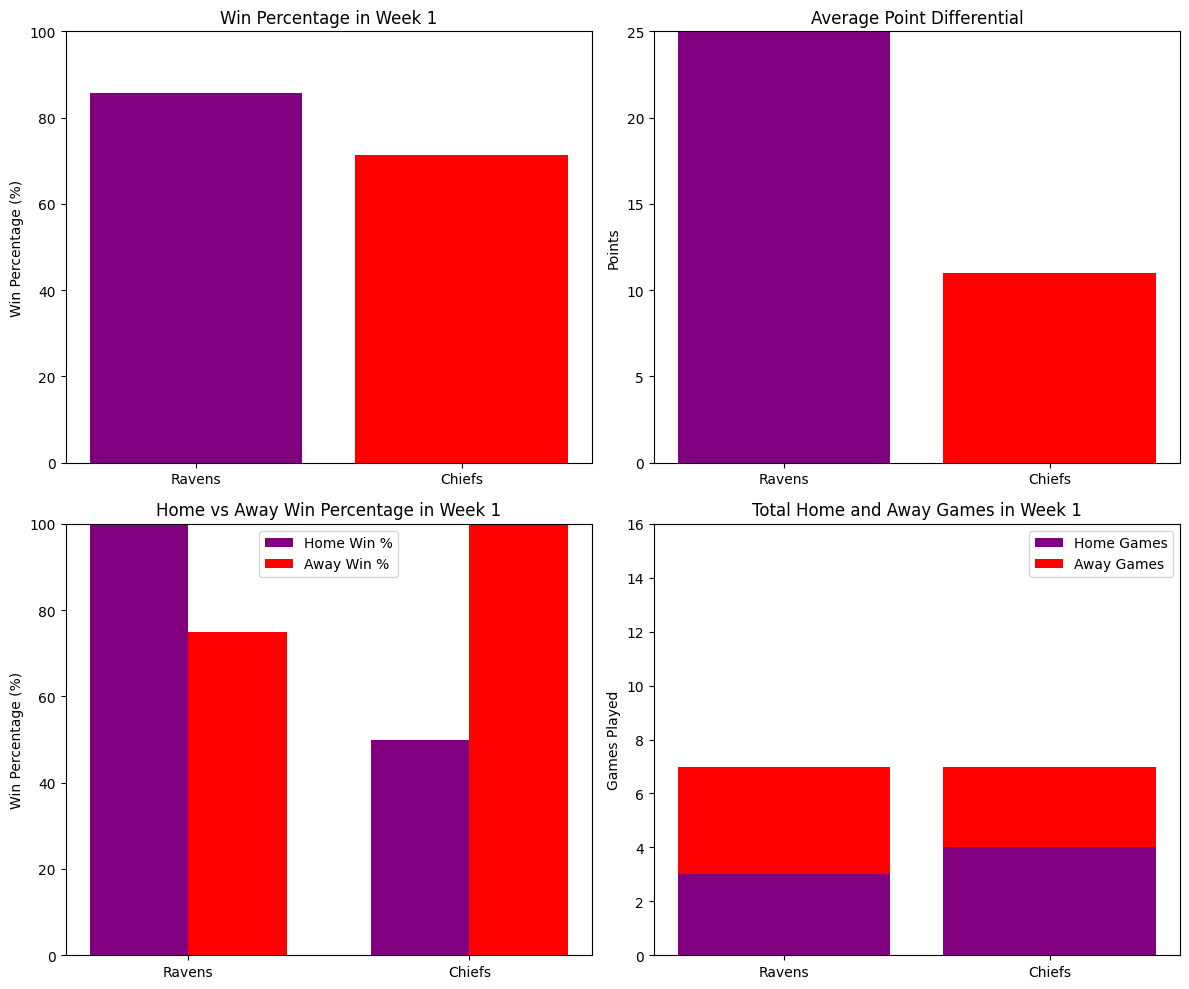

In [22]:
# Chiefs and Ravens Week 1 Stats (Only Since 2018 Season)

db_path = 'nfl.db'  # Replace with your actual path
conn = sqlite3.connect(db_path)

# Query to get all games since 2010
filtered_games_query = """
SELECT * 
FROM Games
WHERE season >= 2018;
"""
filtered_games = pd.read_sql(filtered_games_query, conn)

# Filter for Week 1 games only
week_1_games = filtered_games[filtered_games['week'] == '01']

# Ravens Week 1 Performance
ravens_week_1_games = week_1_games[(week_1_games['home_team'] == 'BAL') | (week_1_games['away_team'] == 'BAL')]
ravens_week_1_games['winner'] = ravens_week_1_games.apply(
    lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1
)
ravens_week_1_games['result'] = ravens_week_1_games.apply(
    lambda row: 'Win' if row['winner'] == 'BAL' else 'Loss', axis=1
)
ravens_win_percentage = (ravens_week_1_games[ravens_week_1_games['result'] == 'Win'].shape[0] / ravens_week_1_games.shape[0]) * 100
ravens_week_1_games['point_differential'] = ravens_week_1_games.apply(
    lambda row: abs(row['home_score'] - row['away_score']), axis=1
)
ravens_avg_point_differential = ravens_week_1_games['point_differential'].mean()
ravens_home_games = ravens_week_1_games[ravens_week_1_games['home_team'] == 'BAL']
ravens_away_games = ravens_week_1_games[ravens_week_1_games['away_team'] == 'BAL']
ravens_home_win_percentage = (ravens_home_games[ravens_home_games['result'] == 'Win'].shape[0] / ravens_home_games.shape[0]) * 100
ravens_away_win_percentage = (ravens_away_games[ravens_away_games['result'] == 'Win'].shape[0] / ravens_away_games.shape[0]) * 100
ravens_total_home_games = ravens_home_games.shape[0]
ravens_total_away_games = ravens_away_games.shape[0]
ravens_week_1_games_summary = {
    'Total Games': ravens_week_1_games.shape[0],
    'Win Percentage': ravens_win_percentage,
    'Average Point Differential': ravens_avg_point_differential,
    'Home Win Percentage': ravens_home_win_percentage,
    'Away Win Percentage': ravens_away_win_percentage,
    'Total Home Games': ravens_total_home_games,
    'Total Away Games': ravens_total_away_games
}

# Chiefs Week 1 Performance
chiefs_week_1_games = week_1_games[(week_1_games['home_team'] == 'KC') | (week_1_games['away_team'] == 'KC')]
chiefs_week_1_games['winner'] = chiefs_week_1_games.apply(
    lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1
)
chiefs_week_1_games['result'] = chiefs_week_1_games.apply(
    lambda row: 'Win' if row['winner'] == 'KC' else 'Loss', axis=1
)
chiefs_win_percentage = (chiefs_week_1_games[chiefs_week_1_games['result'] == 'Win'].shape[0] / chiefs_week_1_games.shape[0]) * 100
chiefs_week_1_games['point_differential'] = chiefs_week_1_games.apply(
    lambda row: abs(row['home_score'] - row['away_score']), axis=1
)
chiefs_avg_point_differential = chiefs_week_1_games['point_differential'].mean()
chiefs_home_games = chiefs_week_1_games[chiefs_week_1_games['home_team'] == 'KC']
chiefs_away_games = chiefs_week_1_games[chiefs_week_1_games['away_team'] == 'KC']
chiefs_home_win_percentage = (chiefs_home_games[chiefs_home_games['result'] == 'Win'].shape[0] / chiefs_home_games.shape[0]) * 100
chiefs_away_win_percentage = (chiefs_away_games[chiefs_away_games['result'] == 'Win'].shape[0] / chiefs_away_games.shape[0]) * 100
chiefs_total_home_games = chiefs_home_games.shape[0]
chiefs_total_away_games = chiefs_away_games.shape[0]
chiefs_week_1_games_summary = {
    'Total Games': chiefs_week_1_games.shape[0],
    'Win Percentage': chiefs_win_percentage,
    'Average Point Differential': chiefs_avg_point_differential,
    'Home Win Percentage': chiefs_home_win_percentage,
    'Away Win Percentage': chiefs_away_win_percentage,
    'Total Home Games': chiefs_total_home_games,
    'Total Away Games': chiefs_total_away_games
}

# Combine the summaries for Ravens and Chiefs
combined_summary = pd.DataFrame([ravens_week_1_games_summary, chiefs_week_1_games_summary], index=['Ravens', 'Chiefs'])

# Display the combined summary
display(combined_summary)

# Extracting data for visualization from the combined_summary
teams = combined_summary.index
total_games = combined_summary['Total Games'].values
win_percentage = combined_summary['Win Percentage'].values
avg_point_diff = combined_summary['Average Point Differential'].values
home_win_percentage = combined_summary['Home Win Percentage'].values
away_win_percentage = combined_summary['Away Win Percentage'].values
total_home_games = combined_summary['Total Home Games'].values
total_away_games = combined_summary['Total Away Games'].values

# Set up the figure and axis
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Bar chart for Win Percentage
ax[0, 0].bar(teams, win_percentage, color=['purple', 'red'])
ax[0, 0].set_title('Win Percentage in Week 1')
ax[0, 0].set_ylim(0, 100)
ax[0, 0].set_ylabel('Win Percentage (%)')

# Bar chart for Average Point Differential
ax[0, 1].bar(teams, avg_point_diff, color=['purple', 'red'])
ax[0, 1].set_title('Average Point Differential')
ax[0, 1].set_ylim(0, 25)
ax[0, 1].set_ylabel('Points')

# Bar chart for Home and Away Win Percentage
x = np.arange(len(teams))
width = 0.35

ax[1, 0].bar(x - width/2, home_win_percentage, width, label='Home Win %', color='purple')
ax[1, 0].bar(x + width/2, away_win_percentage, width, label='Away Win %', color='red')
ax[1, 0].set_title('Home vs Away Win Percentage in Week 1')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(teams)
ax[1, 0].set_ylim(0, 100)
ax[1, 0].set_ylabel('Win Percentage (%)')
ax[1, 0].legend()

# Stacked bar chart for Total Home and Away Games
ax[1, 1].bar(teams, total_home_games, label='Home Games', color='purple')
ax[1, 1].bar(teams, total_away_games, bottom=total_home_games, label='Away Games', color='red')
ax[1, 1].set_title('Total Home and Away Games in Week 1')
ax[1, 1].set_ylim(0, 16)
ax[1, 1].set_ylabel('Games Played')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

In [1]:
# Make 'home_spread' and 'away_spread' Column in nfl.db

import sqlite3
import pandas as pd

# Path to your SQLite database
db_path = 'nfl.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Check if the 'away_spread' and 'home_spread' columns already exist
cursor.execute("PRAGMA table_info(games);")
columns = [info[1] for info in cursor.fetchall()]

# Add the 'away_spread' and 'home_spread' columns if they don't exist
if 'away_spread' not in columns:
    cursor.execute("ALTER TABLE games ADD COLUMN away_spread REAL;")
if 'home_spread' not in columns:
    cursor.execute("ALTER TABLE games ADD COLUMN home_spread REAL;")

# Load the data into a pandas DataFrame
df = pd.read_sql("SELECT * FROM games", conn)

# Calculate 'away_spread' and 'home_spread' based on 'spread_line'
df['away_spread'] = df['spread_line'].apply(lambda x: x if x < 0 else 0)
df['home_spread'] = df['spread_line'].apply(lambda x: x if x > 0 else 0)

# Write the updated 'away_spread' and 'home_spread' columns back into the database
for index, row in df.iterrows():
    cursor.execute("""
        UPDATE games
        SET away_spread = ?, home_spread = ?
        WHERE game_id = ?;
    """, (row['away_spread'], row['home_spread'], row['game_id']))

# Commit the transaction and close the connection
conn.commit()
conn.close()

print("Successfully added 'away_spread' and 'home_spread' columns to the 'games' table.")

Successfully added 'away_spread' and 'home_spread' columns to the 'games' table.


In [3]:
# Calc Cowboys ATS 2023

# Path to your SQLite database
db_path = 'nfl.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Read the table into a pandas DataFrame
df = pd.read_sql("SELECT * FROM games", conn)

# Filter for 2023 games where Cowboys (DAL) are either home or away
cowboys_2023_games = df[(df['season'] == 2023) & 
                        ((df['home_team'] == 'DAL') | (df['away_team'] == 'DAL'))].copy()

# Function to determine if Cowboys covered the spread
def did_cowboys_cover(row):
    if row['home_team'] == 'DAL':  # Cowboys are home team
        point_diff = row['home_score'] - row['away_score']  # actual point difference
        if row['home_spread'] > 0:  # Cowboys are favorites
            return point_diff > row['home_spread']  # Covered if they won by more than the spread
        else:  # Cowboys are underdogs
            return point_diff > row['home_spread']  # Covered if they won or lost by less than the spread
    elif row['away_team'] == 'DAL':  # Cowboys are away team
        point_diff = row['away_score'] - row['home_score']  # actual point difference
        if row['away_spread'] < 0:  # Cowboys are favorites
            return point_diff > abs(row['away_spread'])  # Covered if they won by more than the spread
        else:  # Cowboys are underdogs
            return point_diff > row['away_spread']  # Covered if they won or lost by less than the spread

# Apply the function to each row in the Cowboys' games
cowboys_2023_games['covered'] = cowboys_2023_games.apply(did_cowboys_cover, axis=1)

# Calculate Cowboys' ATS record
ats_wins = cowboys_2023_games['covered'].sum()
ats_losses = len(cowboys_2023_games) - ats_wins

# Display the ATS record
print(f"Cowboys ATS record in 2023: {ats_wins} - {ats_losses}")

# Close the connection
conn.close()


Cowboys ATS record in 2023: 10 - 8


In [5]:
# Calc All Teams ATS 2023

import sqlite3
import pandas as pd

# Path to your SQLite database
db_path = 'nfl.db'

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Read the table into a pandas DataFrame
df = pd.read_sql("SELECT * FROM games", conn)

# Get a list of unique teams from the home and away columns
teams = pd.concat([df['home_team'], df['away_team']]).unique()

# Create a list to store each team's ATS record
team_ats_records = []

# Function to determine if a team covered the spread
def did_team_cover(row, team):
    if row['home_team'] == team:  # Team is home
        point_diff = row['home_score'] - row['away_score']  # actual point difference
        if row['home_spread'] > 0:  # Team is favorite
            return point_diff > row['home_spread']  # Covered if they won by more than the spread
        else:  # Team is underdog
            return point_diff > row['home_spread']  # Covered if they won or lost by less than the spread
    elif row['away_team'] == team:  # Team is away
        point_diff = row['away_score'] - row['home_score']  # actual point difference
        if row['away_spread'] < 0:  # Team is favorite
            return point_diff > abs(row['away_spread'])  # Covered if they won by more than the spread
        else:  # Team is underdog
            return point_diff > row['away_spread']  # Covered if they won or lost by less than the spread

# Loop through each team
for team in teams:
    # Filter for 2023 games where the team is either home or away
    team_2023_games = df[(df['season'] == 2023) & 
                         ((df['home_team'] == team) | (df['away_team'] == team))]

    # Apply the function to each row in the team's games to determine if they covered the spread
    team_2023_games['covered'] = team_2023_games.apply(lambda row: did_team_cover(row, team), axis=1)

    # Calculate the ATS record
    ats_wins = team_2023_games['covered'].sum()
    ats_losses = len(team_2023_games) - ats_wins
    ats_record = ats_wins / len(team_2023_games) if len(team_2023_games) > 0 else 0

    # Store the team's ATS record and win percentage
    team_ats_records.append({
        'team': team,
        'ats_wins': ats_wins,
        'ats_losses': ats_losses,
        'ats_record': ats_record  # win percentage
    })

# Convert the records to a DataFrame
ats_df = pd.DataFrame(team_ats_records)

# Sort the teams by ATS win percentage in descending order
ats_df = ats_df.sort_values(by='ats_wins', ascending=False)

# Reset the index and create a new column 'rank' starting from 1
ats_df = ats_df.reset_index(drop=True)
ats_df.index += 1  # Make the index start at 1

# Display the sorted ATS records
print(ats_df[['team', 'ats_wins', 'ats_losses', 'ats_record']])

# Close the connection
conn.close()


   team  ats_wins  ats_losses  ats_record
1    KC        13           8    0.619048
2   BAL        12           7    0.631579
3   DET        12           8    0.600000
4   MIA        10           8    0.555556
5   PIT        10           8    0.555556
6   DAL        10           8    0.555556
7   JAX         9           8    0.529412
8    SF         9          11    0.450000
9    TB         9          10    0.473684
10  CLE         9           9    0.500000
11  HOU         9          10    0.473684
12   GB         9          10    0.473684
13  LVR         8           9    0.470588
14  BUF         8          11    0.421053
15  LAR         8          10    0.444444
16  IND         8           9    0.470588
17  CIN         7          10    0.411765
18  PHI         7          11    0.388889
19  CHI         6          11    0.352941
20  MIN         6          11    0.352941
21   NO         6          11    0.352941
22  DEN         6          11    0.352941
23  TEN         6          11    0

/var/folders/hd/r4k9j4m15vd1bc_tnk5pn5_c0000gn/T/ipykernel_81093/921651399.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_2023_games['covered'] = team_2023_games.apply(lambda row: did_team_cover(row, team), axis=1)
/var/folders/hd/r4k9j4m15vd1bc_tnk5pn5_c0000gn/T/ipykernel_81093/921651399.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_2023_games['covered'] = team_2023_games.apply(lambda row: did_team_cover(row, team), axis=1)
/var/folders/hd/r4k9j4m15vd1bc_tnk5pn5_c0000gn/T/ipykernel_8

In [12]:
# # Calculate the total win/loss record of favorites versus underdogs covering the spread for week 1 games since 2010

# import sqlite3
# import pandas as pd

# # Path to your SQLite database
# db_path = 'nfl.db'  # Replace with the path to your database

# # Connect to the SQLite database
# conn = sqlite3.connect(db_path)

# # Read the 'Games' table into a pandas DataFrame
# df = pd.read_sql("SELECT * FROM Games", conn)

# # Filter for games in Week 1 since 2010
# week1_games = df[(df['season'] >= 2010) & (df['week'] == '01')]

# # Function to determine if the favorite covered the spread
# def did_favorite_cover(row):
#     if row['home_spread'] < 0:  # Home team is the favorite
#         point_diff = row['home_score'] - row['away_score']  # actual point difference
#         return point_diff > abs(row['home_spread'])  # Covered if they won by more than the spread
#     elif row['away_spread'] < 0:  # Away team is the favorite
#         point_diff = row['away_score'] - row['home_score']  # actual point difference
#         return point_diff > abs(row['away_spread'])  # Covered if they won by more than the spread
#     else:  # No favorite
#         return False

# # Initialize counters for favorites and underdogs covering the spread
# favorites_cover = 0
# underdogs_cover = 0

# # Loop through each game to determine if the favorite covered
# for index, row in week1_games.iterrows():
#     if did_favorite_cover(row):
#         favorites_cover += 1  # Favorite covered
#     else:
#         underdogs_cover += 1  # Underdog covered

# # Close the connection
# conn.close()

# # Print the results
# print(f"Favorites covering the spread: {favorites_cover}")
# print(f"Underdogs covering the spread: {underdogs_cover}")

# Re-run the analysis with the updated logic, including filtering for missing spreads and tracking invalid games

# Connect to the SQLite database
conn = sqlite3.connect('nfl.db')

# Read the 'Games' table into a pandas DataFrame
df = pd.read_sql("SELECT * FROM Games", conn)

# Filter for games in Week 1 since 2010 and where spread data exists
week1_games = df[(df['season'] >= 2010) & (df['week'] == '01') & 
                 (~df['home_spread'].isnull()) & (~df['away_spread'].isnull())]

# Function to determine if the favorite covered the spread
def did_favorite_cover(row):
    if row['home_spread'] < 0:  # Home team is the favorite
        point_diff = row['home_score'] - row['away_score']  # actual point difference
        return point_diff > abs(row['home_spread'])  # Covered if they won by more than the spread
    elif row['away_spread'] < 0:  # Away team is the favorite
        point_diff = row['away_score'] - row['home_score']  # actual point difference
        return point_diff > abs(row['away_spread'])  # Covered if they won by more than the spread
    else:  # No clear favorite
        return None  # Return None if no favorite is identified

# Initialize counters for favorites and underdogs covering the spread
favorites_cover = 0
underdogs_cover = 0
invalid_games = 0  # Track games where no favorite could be identified

# Loop through each game to determine if the favorite covered
for index, row in week1_games.iterrows():
    result = did_favorite_cover(row)
    
    if result is None:
        invalid_games += 1  # Count games without a clear favorite
    elif result:
        favorites_cover += 1  # Favorite covered
    else:
        underdogs_cover += 1  # Underdog covered

# Close the connection
conn.close()

favorites_cover, underdogs_cover, invalid_games


(39, 46, 154)

In [ ]:
# Favorites in Week 1

db_path = 'nfl.db'  # Replace with your actual path
conn = sqlite3.connect(db_path)

# Query to get all games since 2010
filtered_games_query = """
SELECT * 
FROM Games
WHERE season >= 2010;
"""
filtered_games = pd.read_sql(filtered_games_query, conn)

# Step 1: Filter for Week 1 games
week_1_games = filtered_games[filtered_games['week'] == '01'].copy()

# Step 2: Determine if the away team is the favorite
week_1_games['away_favorite'] = week_1_games['spread_line'] < 0

# Step 3: Calculate if the spread was covered
week_1_games['spread_covered'] = week_1_games.apply(
    lambda row: (row['away_score'] - row['home_score']) > row['spread_line'] 
                if row['away_favorite'] 
                else (row['home_score'] - row['away_score']) > abs(row['spread_line']), axis=1)

# Step 4: Calculate cover percentage for both favorites and underdogs
favorite_cover_percentage = week_1_games[week_1_games['away_favorite']]['spread_covered'].mean() * 100
underdog_cover_percentage = week_1_games[~week_1_games['away_favorite']]['spread_covered'].mean() * 100

# Step 5: Visualize the cover percentages
import matplotlib.pyplot as plt

cover_data = {'Favorite': favorite_cover_percentage, 'Underdog': underdog_cover_percentage}
cover_names = list(cover_data.keys())
cover_values = list(cover_data.values())

# Plot the cover percentages for favorites and underdogs
plt.figure(figsize=(8, 6))
plt.bar(cover_names, cover_values, color=['blue', 'green'])
plt.title('Spread Covered by Favorites vs Underdogs in Week 1')
plt.ylabel('Cover Percentage (%)')
plt.ylim(0, 100)

# Show the plot
plt.tight_layout()
plt.show()

cover_data


In [ ]:
# Favorites in Week 1 (Since 2018)

db_path = 'nfl.db'  # Replace with your actual path
conn = sqlite3.connect(db_path)

# Query to get all games since 2010
filtered_games_query = """
SELECT * 
FROM Games
WHERE season >= 2018;
"""
filtered_games = pd.read_sql(filtered_games_query, conn)

# Step 1: Filter for Week 1 games
week_1_games = filtered_games[filtered_games['week'] == '01'].copy()

# Step 2: Determine if the away team is the favorite
week_1_games['away_favorite'] = week_1_games['spread_line'] < 0

# Step 3: Calculate if the spread was covered
week_1_games['spread_covered'] = week_1_games.apply(
    lambda row: (row['away_score'] - row['home_score']) > row['spread_line'] 
                if row['away_favorite'] 
                else (row['home_score'] - row['away_score']) > abs(row['spread_line']), axis=1)

# Step 4: Calculate cover percentage for both favorites and underdogs
favorite_cover_percentage = week_1_games[week_1_games['away_favorite']]['spread_covered'].mean() * 100
underdog_cover_percentage = week_1_games[~week_1_games['away_favorite']]['spread_covered'].mean() * 100

# Step 5: Visualize the cover percentages
import matplotlib.pyplot as plt

cover_data = {'Favorite': favorite_cover_percentage, 'Underdog': underdog_cover_percentage}
cover_names = list(cover_data.keys())
cover_values = list(cover_data.values())

# Plot the cover percentages for favorites and underdogs
plt.figure(figsize=(8, 6))
plt.bar(cover_names, cover_values, color=['blue', 'green'])
plt.title('Spread Covered by Favorites vs Underdogs in Week 1')
plt.ylabel('Cover Percentage (%)')
plt.ylim(0, 100)

# Show the plot
plt.tight_layout()
plt.show()

cover_data


    Spread  Favorite Covers  Total Games  Favorite Cover Spread %
22   -10.0                0            2                 0.000000
35    -9.5                0            1                 0.000000
16    -9.0                0            1                 0.000000
14    -7.0                2            4                50.000000
31    -6.5                1            3                33.333333
33    -6.0                3            6                50.000000
27    -5.5                1            2                50.000000
25    -5.0                0            1                 0.000000
19    -4.5                2            2               100.000000
10    -4.0                2            5                40.000000
8     -3.5                7           13                53.846154
1     -3.0                9           17                52.941176
29    -2.5                5           11                45.454545
32    -2.0                1            1               100.000000
34    -1.5

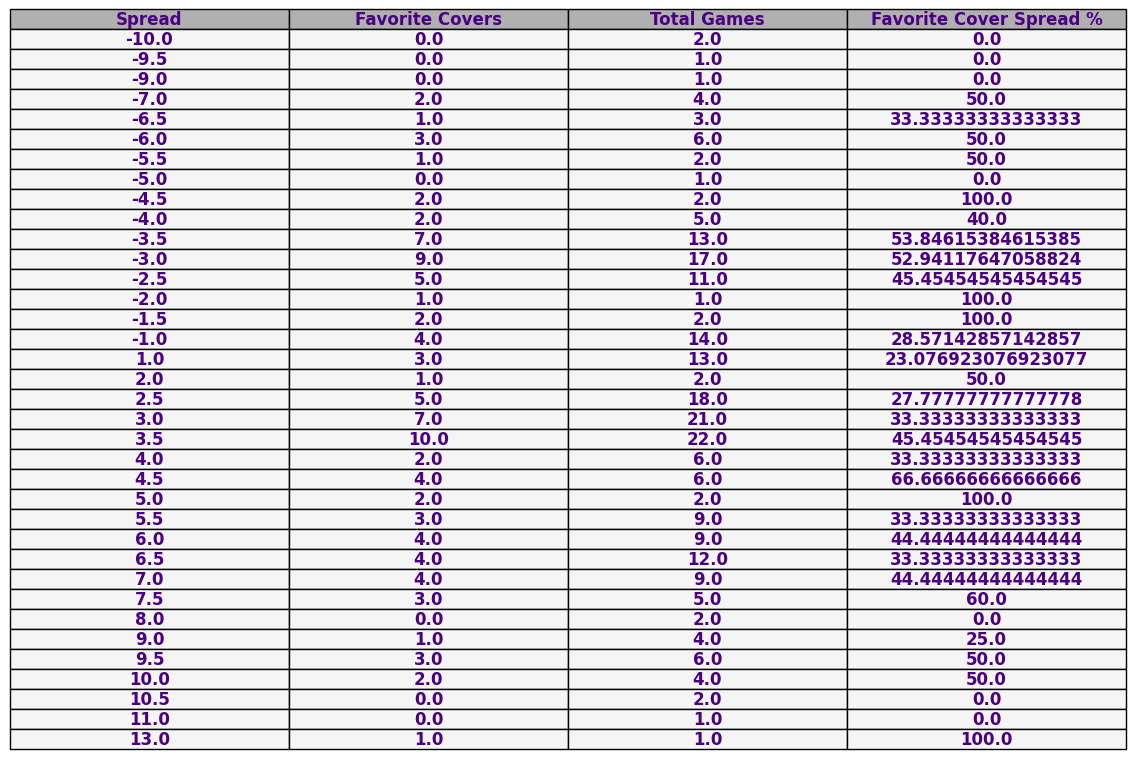

In [18]:
# Spread Results in Week 1

# Connect to your NFL database
db_path = 'nfl.db'  # Replace with your actual path
conn = sqlite3.connect(db_path)

# Query to get all games since 2018
filtered_games_query = """
SELECT * 
FROM Games
WHERE season >= 2010;
"""
filtered_games = pd.read_sql(filtered_games_query, conn)

# Step 1: Filter for Week 1 games
week_1_games = filtered_games[filtered_games['week'] == '01'].copy()

# Step 2: Determine if the away team is the favorite
week_1_games['away_favorite'] = week_1_games['spread_line'] < 0

# Step 3: Calculate if the spread was covered
# week_1_games['spread_covered'] = week_1_games.apply(
#     lambda row: (row['away_score'] - row['home_score']) > row['spread_line'] 
#                 if row['away_favorite'] 
#                 else (row['home_score'] - row['away_score']) > abs(row['spread_line']), axis=1)
# Corrected logic for calculating if the spread was covered
week_1_games['spread_covered'] = week_1_games.apply(
    lambda row: (row['away_score'] - row['home_score']) > abs(row['spread_line']) 
                if row['away_favorite'] 
                else (row['home_score'] - row['away_score']) > abs(row['spread_line']), axis=1)

week_1_games[['away_team', 'home_team', 'away_score', 'home_score', 'spread_line', 'spread_covered']]

# Step 4: Get the unique spread_line values for Week 1 games
unique_spread_lines = week_1_games['spread_line'].unique()

# Step 5: For each unique spread_line, calculate the favorite's win/loss in covering the spread
spread_coverage_results = []

for spread in unique_spread_lines:
    games_with_spread = week_1_games[week_1_games['spread_line'] == spread]
    favorite_covers = games_with_spread[games_with_spread['spread_covered']].shape[0]
    favorite_total = games_with_spread.shape[0]
    spread_coverage_results.append((spread, favorite_covers, favorite_total))

# Convert to DataFrame for easier display
spread_coverage_df = pd.DataFrame(spread_coverage_results, columns=['Spread', 'Favorite Covers', 'Total Games'])

# Calculate the win/loss ratio for covering the spread
spread_coverage_df['Favorite Cover Spread %'] = (spread_coverage_df['Favorite Covers'] / spread_coverage_df['Total Games']) * 100

# Sort the results for better readability
spread_coverage_df = spread_coverage_df.sort_values(by='Spread', ascending=True)

# Display the results
print(spread_coverage_df)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size as needed

# Hide the axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False) 

# Create a table from the DataFrame
table = ax.table(cellText=spread_coverage_df.values,
                 colLabels=spread_coverage_df.columns,
                 cellLoc='center',
                 loc='center')

# Define colors
background_color = '#F5F5F5'  # Light gray for table
text_color = '#4B0082'        # Dark purple for text
header_color = '#B0B0B0'      # Darker gray for header row

# Apply colors and make text bold
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor(header_color)
    else:
        cell.set_facecolor(background_color)
    cell.set_text_props(color=text_color, weight='bold')  # Set text color and make it bold

# Adjust the font size for readability
table.auto_set_font_size(False)
table.set_fontsize(12)  # Adjust font size as needed
table.scale(1.2, 1.2)  # Scale the table size if needed

# Save the table as an image
plt.savefig('spread_coverage.png', bbox_inches='tight', dpi=300)

# Optionally, you can also show the plot if you want to preview it
plt.show()



# Visualize the results (optional)
# spread_coverage_df.plot(kind='bar', x='Spread Line', y='Win Percentage', title='Spread Coverage by Favorites in Week 1', legend=False)
# plt.ylabel('Win Percentage (%)')
# plt.show()

# # Interactive Plotly visualization
# min_spread = spread_coverage_df['Spread Line'].min()
# max_spread = spread_coverage_df['Spread Line'].max()
# spread_range = np.arange(min_spread, max_spread + 0.5, 0.5)
# fig = px.bar(spread_coverage_df, x='Spread Line', y='Win Percentage', 
#              title='Spread Coverage by Favorites in Week 1',
#              labels={'Win Percentage': 'Win Percentage (%)'},
#              hover_data=['Total Games', 'Covers'],
#              text='Total Games',  # This will place the total games inside the bars
#              height=600)  # Adjust height of the chart

# # Update the x-axis to show more labels
# fig.update_xaxes(tickmode='array', tickvals=spread_range, tickangle=90)

# # Customize the text inside the bars
# fig.update_traces(textposition='inside', texttemplate='%{text} games')

# # Show the interactive plot
# # Show the interactive plot
# fig.show()

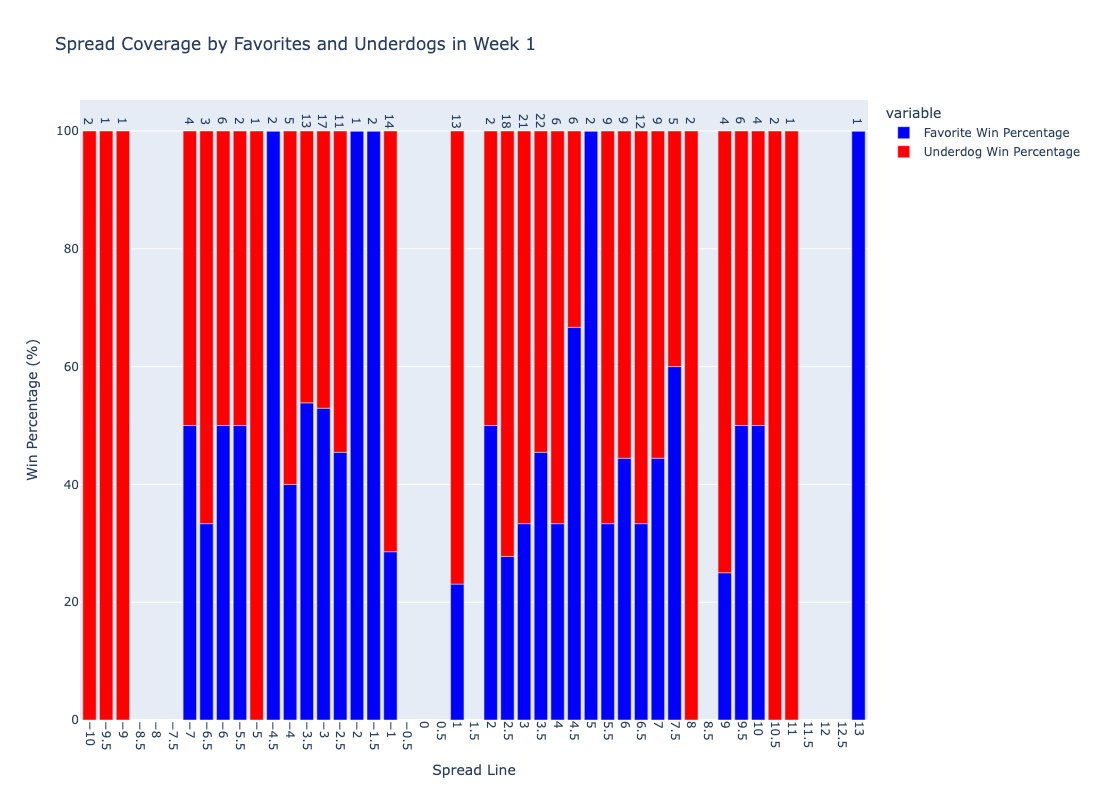

In [20]:
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px

# Connect to your NFL database
db_path = 'nfl.db'  # Replace with your actual path
conn = sqlite3.connect(db_path)

# Query to get all games since 2010
filtered_games_query = """
SELECT * 
FROM Games
WHERE season >= 2010;
"""
filtered_games = pd.read_sql(filtered_games_query, conn)

# Step 1: Filter for Week 1 games
week_1_games = filtered_games[filtered_games['week'] == '01'].copy()

# Step 2: Determine if the away team is the favorite
week_1_games['away_favorite'] = week_1_games['spread_line'] < 0

# Step 3: Corrected logic for calculating if the spread was covered
week_1_games['spread_covered'] = week_1_games.apply(
    lambda row: (row['away_score'] - row['home_score']) > abs(row['spread_line']) 
                if row['away_favorite'] 
                else (row['home_score'] - row['away_score']) > abs(row['spread_line']), axis=1)

# Step 4: Calculate cover percentages for both favorites and underdogs
spread_coverage_results = []

for spread in unique_spread_lines:
    games_with_spread = week_1_games[week_1_games['spread_line'] == spread]
    total_games = games_with_spread.shape[0]
    
    # Calculate favorite and underdog covers
    favorite_covers = games_with_spread[games_with_spread['spread_covered']].shape[0]
    underdog_covers = total_games - favorite_covers
    
    spread_coverage_results.append({
        'Spread Line': spread,
        'Favorite Covers': favorite_covers,
        'Underdog Covers': underdog_covers,
        'Total Games': total_games
    })

# Convert to DataFrame for easier display
spread_coverage_df = pd.DataFrame(spread_coverage_results)

# Calculate the percentages
spread_coverage_df['Favorite Win Percentage'] = (spread_coverage_df['Favorite Covers'] / spread_coverage_df['Total Games']) * 100
spread_coverage_df['Underdog Win Percentage'] = (spread_coverage_df['Underdog Covers'] / spread_coverage_df['Total Games']) * 100

# Step 5: Create the grouped bar chart
fig = px.bar(spread_coverage_df, 
             x='Spread Line', 
             y=['Favorite Win Percentage', 'Underdog Win Percentage'], 
             title='Spread Coverage by Favorites and Underdogs in Week 1',
             labels={'value': 'Win Percentage (%)'},
             height=800,
             color_discrete_map={'Favorite Win Percentage': 'blue', 'Underdog Win Percentage': 'red'})

# Ensure all spread values are shown on the x-axis
min_spread = spread_coverage_df['Spread Line'].min()
max_spread = spread_coverage_df['Spread Line'].max()
spread_range = np.arange(min_spread, max_spread + 0.5, 0.5)
fig.update_xaxes(tickmode='array', tickvals=spread_range, tickangle=90)

# Manually add annotations above each column for total games
for i, total_games in enumerate(spread_coverage_df['Total Games']):
    spread_line = spread_coverage_df['Spread Line'].iloc[i]
    fig.add_annotation(x=spread_line, y=100, textangle=90,  # Position just above the bars
                       text=str(total_games), 
                       showarrow=False,
                       font=dict(size=12),
                       yshift=10)

# Show the interactive plot
fig.show()
fig.write_image('spread_coverage_chart.png', format='png')  # Save as PNG file


In [ ]:
# Analyze games from one of the spreads above

# Step 6: Filter and print all the game details for -10 spread games
spread_line_10_games = week_1_games[week_1_games['spread_line'] == -9.5]

# Print the filtered games
# display(spread_line_10_games)
display(spread_line_10_games[['game_id', 'spread_line', 'away_team', 'away_score', 'home_team', 'home_score']])